<a href="https://colab.research.google.com/github/Krumpu/Homework_ICA/blob/main/HW_1_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - ANÁLISE DO DATASET E SUAS CARACTERÍSTICAS

Códigos para importação do conjunto de dados, para determinação do número de amostras, de preditores e quais serão as classes analisadas.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('_mpl-gallery')
plt.rcParams.update({'font.size': 20})
url = 'https://raw.githubusercontent.com/Krumpu/Homework_ICA/main/Data-Melbourne_F.csv'
df = pd.read_csv(url)

# We can remove "year", "month" and "day" columns,
# since we did no time series analysis today...
# "VG" is removed, we do not have any info about
df = df.drop(['SLP', 'VG', 'year', 'month', 'day'], axis=1)

# Information about our data set
print('Number of Observations (N): ', df.shape[0])
print('Number of Predictor Variables (D): ', df.shape[1])

# Q diabos é isso abaix kaique??? Why?
print(df['COD'].describe())
print(df['BOD'].describe())

Number of Observations (N):  1382
Number of Predictor Variables (D):  15
count    1382.000000
mean      845.960434
std       145.416540
min       360.000000
25%       751.250000
50%       845.000000
75%       920.000000
max      1700.000000
Name: COD, dtype: float64
count    1382.000000
mean      382.061708
std        85.996012
min       140.000000
25%       330.000000
50%       360.000000
75%       422.980000
max       850.000000
Name: BOD, dtype: float64


## 1.1 - **Classes**

Como indicadores de economia/deseperdicio durante o tratamento, utilizaremos as métricas COD e BOD, que respectivamente significam Chemical Oxygen Demand (mg/L) e Biological Oxygen Demand (mg/L).\
\
Dessa forma, podemos dividir o intervalo desses indicadores em n partes, utilizando-as como classificação.\
\
A Chemical Oxygen Demand(COD), indica a quantidade de oxigênio utilizado durante a reação quimica para consumir contaminantes presentes. \
Já a Biological Oxygen Demand(BOD), é a unidade de medida utilizada para determinar a quantidade de oxigênio utilizado por organismos biológicos aeróbicos. \
Com os dois indicativos construiremos classes formadas da combinação dos dois intervalos criados pela média de COD e de BOD. \
\
Iremos dividir os nossos dados em 3 intervalos para cada um dos seguintes preditores:\
COD:\
  Baixo: 360 - 790;\
  Medio: 791 - 890;\
  Alto: 891 - 1700.\
\
BOD:\
  Baixo: 140 - 340;\
  Medio: 341 - 400;\
  Alto: 401 - 850.\
\
PP:\
  Sem chuva: <0.1;\
  Leve: 0.1 - 1;\
  Moderada: >1;\
\

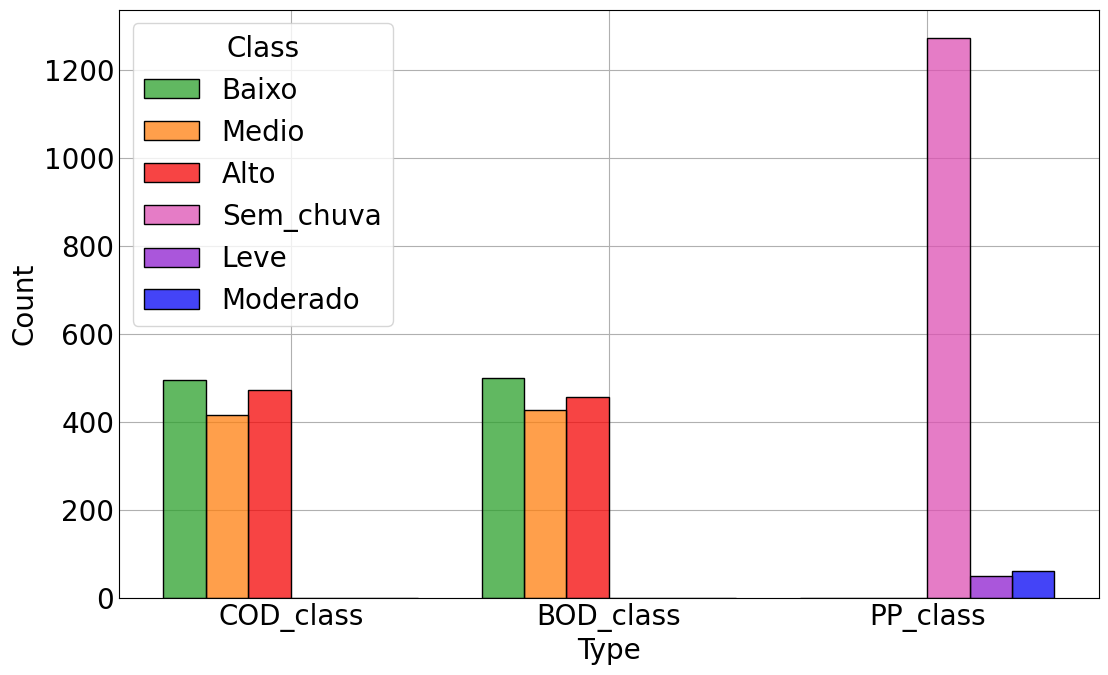

In [43]:
df.loc[(df['COD'] >= 360) & (df['COD'] <= 790), "COD_class"] = "Baixo"
df.loc[(df['COD'] >= 791) & (df['COD'] <= 890), "COD_class"] = "Medio"
df.loc[(df['COD'] >= 891) & (df['COD'] <= 1700), "COD_class"] = "Alto"

df.loc[(df['BOD'] >= 140) & (df['BOD'] <= 340), "BOD_class"] = "Baixo"
df.loc[(df['BOD'] >= 341) & (df['BOD'] <= 400), "BOD_class"] = "Medio"
df.loc[(df['BOD'] >= 401) & (df['BOD'] <= 850), "BOD_class"] = "Alto"

df.loc[df['PP'] < 0.1, "PP_class"] = "Sem_chuva"
df.loc[(df['PP'] >= 0.1) & (df['PP'] <= 1), "PP_class"] = "Leve"
df.loc[df['PP'] > 1, "PP_class"] = "Moderado"

df_classes = df[['COD_class', 'BOD_class', 'PP_class']].copy()
df = df.drop(['COD_class', 'BOD_class', 'PP_class'], axis=1)

paleta = {
    "Baixo": "#2ca02c",
    "Medio": "#ff7f0e",
    "Alto":  "#F50505",
    "Sem_chuva": "#DD50B3",
    "Leve": "#8E1ECF",
    "Moderado": "#0505F5",
    "nan": "#000000"
}

# Class distribution
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_classes.melt(var_name='Type', value_name='Class'),
    x='Type',
    hue='Class',
    hue_order=['Baixo', 'Medio', 'Alto', 'Sem_chuva', 'Leve', 'Moderado'],
    multiple='dodge',   # or 'stack'
    shrink=0.8,
    palette=paleta
)
plt.show()



---
# 2 - ANÁLISE INCONDICIONAL MONOVARIADA

Análise de cada preditor individualmente. É a forma mais simples de analisar os dados

In [ ]:
def analyze_dataset(df: pd.DataFrame):
    stats_analysis = pd.DataFrame(columns=['name', 'mean', 'std_deviation', 'skewness'])

    for index, predictor in enumerate(df.columns):
        stats_analysis.loc[index] = [predictor, df[predictor].mean().round(2), round(df[predictor].std(), 2), df[predictor].skew().round(2)]

    # For index starting at 1
    stats_analysis.index = stats_analysis.index + 1
    return stats_analysis

generated_files = []

for i, predictor in enumerate(df.columns):
    fig, axs = plt.subplots(1, 2, figsize=(18,9))

    _, bins, _ = axs[0].hist(df[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(df[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 1.0},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 1.0},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

    plt.tight_layout()

    filename = f'./img/plot_{predictor}.png'
    fig.savefig(filename, bbox_inches='tight')
    generated_files.append(filename)

analyze_dataset(df)

In [ ]:
# Compactação dos arquivos para fazer o download
# !zip -r plots.zip ./img

---
# 3 - ANÁLISE **CONDICIONAL** MONOVARIADA
Descrever e investigar como os preditores distribuem-se entre as classes

## 3.1 - ANÁLISE DO KAIQUE

### 3.1.1 - CHEMICAL OXYGEN DEMAND (COD) BAIXO

In [ ]:
# Tipo1 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo1.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo1[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo1[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting at 1
analyze_dataset(tipo1)

### 3.1.2 - CHEMICAL OXYGEN DEMAND (COD) MÉDIO

In [ ]:
# Tipo2 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo2.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo2[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo2[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting at 1
analyze_dataset(tipo2)

### 3.1.3 - CHEMICAL OXYGEN DEMAND (COD) ALTO

In [ ]:
# Tipo3 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo3.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo3[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo3[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting at 1
analyze_dataset(tipo3)

### 3.1.4 - BIOLOGICAL OXYGEN DEMAND (BOD) BAIXO

In [ ]:
# Tipo4 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo4.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo4[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo4[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting at 1
analyze_dataset(tipo4)

### 3.1.5 - BIOLOGICAL OXYGEN DEMAND (BOD) MÉDIO

In [ ]:
# Tipo5 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo5.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo5[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo5[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting at 1
analyze_dataset(tipo5)

### 3.1.6 - BIOLOGICAL OXYGEN DEMAND (BOD) ALTO

In [ ]:
# Tipo6 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo6.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo6[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo6[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting6t 1
analyze_dataset(tipo6)

### 3.1.7 - SEM CHUVA

In [ ]:
# Tipo7 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo7.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo7[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo7[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting6t 1
analyze_dataset(tipo7)

### 3.1.8 - CHUVA LEVE

In [ ]:
# Tipo8 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo8.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo8[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo8[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting6t 1
analyze_dataset(tipo8)

### 3.1.9 - CHUVA MODERADA

In [ ]:
# Tipo9 - Analise Condicional do Kaique

for i, predictor in enumerate(tipo9.columns):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    _, bins, _ = axs[0].hist(tipo9[predictor], bins=16, linewidth=0.5, edgecolor='white')
    axs[0].set(xticks=bins[::4], title=f'{predictor} histogram')
    axs[1].boxplot(tipo9[predictor], patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
    axs[1].set(title=f'{predictor} boxplot')

# For index starting6t 1
analyze_dataset(tipo9)

## 3.2 - ANÁLISE DO MARCO

In [ ]:
# No_rain analysis - Analise condicional do Marco

print(analyze_dataset(df_no_rain))

pairgrid = sns.pairplot(
    df_no_rain,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                 # marker size
        alpha=0.5,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",   # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")

        # Remove tick marks and labels
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

In [ ]:
# Light_rain analysis - Analise condicional do Marco

pairgrid = sns.pairplot(
    df_light_rain,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                 # marker size
        alpha=0.5,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",   # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")

        # Remove tick marks and labels
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

In [ ]:
# Moderate_rain analysis - Analise condicional do Marco

pairgrid = sns.pairplot(
    df_moderate_rain,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                 # marker size
        alpha=0.5,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",   # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")

        # Remove tick marks and labels
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

# 4 - ANÁLISE INCONDICIONAL **BIVARIADA**

### Descrever e investigar como os preditores distribuem-se entre si


In [ ]:
# Unconditional bi-variate analysis of the predictors

pairgrid = sns.pairplot(
    df,
    height=1,
    aspect=1,
    plot_kws=dict(
        s=64,                # marker size
        alpha=0.4,           # transparency
        marker='.',          # marker type ('o', '^', '.', 'x', etc.)
        edgecolor="blue",    # thin black edge (set to 'none' to disable)
        linewidth=0.1,
    )
    hue=""
)

for ax in pairgrid.axes.flatten():
    if ax is not None:
        ax.grid(False)
        ax.set_facecolor("white")
        ax.set_xticks([])
        ax.set_yticks([])

pairgrid.fig.tight_layout(pad=0.2)
plt.show()

# 5 - PCA**

##Passos
1 - Normalização dos dados\
2 - Construção da matriz de covariancia\
3 - Determinação dos autovalores e autovetores da matriz de covariancia\
4 - Ordenação dos autovetores por autovalor
5 - Seleção

In [ ]:
df_new = (df - df.mean())/df.std()
df_new.head()

In [ ]:
cov = df_new.cov();
cov

In [ ]:
autovalores, autovetores= np.linalg.eig(cov)


#indice_ordenado = np.argsort(autovalores)[::-1]
#autoval_ord = autovalores[indice_ordenado]
#autovet_ord = autovetores[:, indice_ordenado]
#print(autoval_ord)
#print(autovet_ord)
print(autovalores)
print(autovetores)

In [ ]:
#Toericamente não precisa fazer isso aqui, posso só pegar os 2 maiores autovalore, mas eu fiz por curiosidade

variancia_total = np.sum(autovalores)
variancia_exp = autovalores/variancia_total

print(variancia_exp)

vet_maiores = (autovetores[0], autovetores[1])

In [ ]:
#screeplots
autovalores_dec = np.sort(autovalores)[::-1]
print(autovalores_dec)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(autovalores_dec) + 1), autovalores_dec, marker='o', label='Autovalores_dec')
plt.xlabel('Componentes Principais')
plt.ylabel('Autovalores_dec')
plt.title('Scree Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)


O documento solicita somente os dois principais componentes

In [ ]:
pca_df = np.matmul(vet_maiores,np.transpose(df_new))
pca_df = np.transpose(pca_df)
pca_df


